# SAI - I 트리케라톱스 팀 과제
**Chapter 3 실습코드**


Chapter 3에서는 세 가지 문제에 대해 어떻게 신경망을 짜는 지 알려 준다.
1. 이진 분류
2. 다중 분류
3. 회귀


## 케라스의 작업 흐름

1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의합니다.
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)을 정의합니다.
3. 손실 함수, optimizer, 모니터링하기 위한 측정 지표를 선택하여 학습과정을 설명합니다.
4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출합니다.

구현 방법은
- Sequential 클래스를 쓴다
- 함수형 API를 쓴다

In [2]:
# Sequential 클래스
from keras import models
from keras import layers

In [3]:
model = models.Sequential()

In [4]:
model.add(layers.Dense(32, activation='relu', input_shape =(784,)))
model.add(layers.Dense(10, activation= 'softmax'))

In [5]:
# 함수형 API
input_tensor = layers.Input(shape = (784, ))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

In [7]:
model = models.Model(inputs = input_tensor, outputs = output_tensor)

신경망의 구성 자체는 이렇게 두 가지 방식으로 만들 수 있지만, 학습 과정은 동일한 방법을 사용할 수 있음.

In [8]:
from keras import optimizers

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss = 'mse',
              metrics = ['accuracy'])

In [12]:
# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## 이진 분류 예제

- 주제:영화 리뷰 분류
- IMDB 데이터셋 활용

In [13]:
from keras.datasets import imdb

In [15]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 빈번한 10000개의 단어만 사용해서 훈련하겠다는 의미

17465344/17464789 [==============================] - 0s 0us/step


In [18]:
# 데이터 뜯어보기
print(train_data[0][:10]) # 인코딩된 단어 시퀀스의 인덱스
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1


In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [20]:
decoded_review # 매핑되었던 단어들을 다시 꺼내서 원래 문장 복원해보기

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

데이터를 신경망에 넣기 좋은 상태로 바꾸기(list -> Tensor)

방법은 두 가지가 있다. 

1. 같은 길이가 되도록 패딩을 추가하고 텐서로 변환하기
2. 원핫인코딩

In [30]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [31]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 만들기

Dense 층의 인자로 넣어 주는 것은 hidden unit의 크기인데, Dense 층을 거치면 input data의 크기만했던 data가 hidden unit 만큼의 차원의 벡터로 매핑된다.
 
 
 만약 hidden unit의 크기를 키운다면 좀더 복잡한 표현을 학습할 수 있지만, 연산량이 많아지며 overfitting의 위험이 있다. 따라서 Dense 층을 쌓을 땐 Dense 층을 얼마나 쌓을 것인지, 그리고 hidden unit을 어떻게 설정할 것인지를 잘 결정해야 한다.

In [21]:
bin_model = models.Sequential()

In [23]:
bin_model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
bin_model.add(layers.Dense(16, activation = 'relu'))
bin_model.add(layers.Dense(1, activation ='sigmoid'))

In [38]:
bin_model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])

# 만약 여기에 커스텀 또는 각종 인자를 바꾼 손실 함수나 optimizer를 넣고 싶다면, 인자로 문자열이 아닌 object를 넣어주면 된다.

In [39]:
# 모델의 정확도를 측정하기 위해 샘플을 떼어 놓음
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
history = bin_model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size= 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5430 - accuracy: 0.7845 - val_loss: 0.4207 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3331 - accuracy: 0.8987 - val_loss: 0.3203 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2386 - accuracy: 0.9251 - val_loss: 0.2821 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1892 - accuracy: 0.9401 - val_loss: 0.2995 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1506 - accuracy: 0.9539 - val_loss: 0.2780 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1267 - accuracy: 0.9603 - val_loss: 0.2874 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1033 - accuracy: 0.9699 - val_loss: 0.3205 - val_accuracy: 0.8785
Epoch 8/20
30

### 훈련 성과 그래프로 나타내기

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history

In [43]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss 그래프

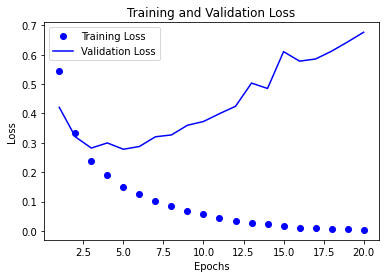

In [44]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

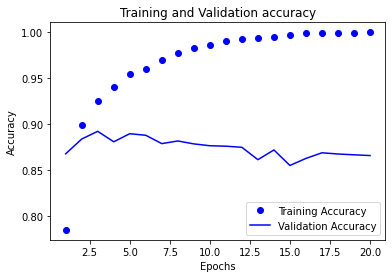

In [45]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

여기서 나타난 바론 Epoch가 3 정도만 넘어가도 과대 적합이 나타난다. 그렇다면 에포크 수를 줄여서 처음부터 훈련을 시켜보도록 하자.

In [46]:
bin_model2 = models.Sequential()
bin_model2.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
bin_model2.add(layers.Dense(16, activation = 'relu'))
bin_model2.add(layers.Dense(1, activation ='sigmoid'))
bin_model2.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
bin_model2.fit(x_train, y_train, epochs = 4, batch_size= 512)
results = bin_model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4561 - accuracy: 0.8210
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2675 - accuracy: 0.9071
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2046 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8822


In [47]:
results = bin_model.evaluate(x_test, y_test)
results2 = bin_model2.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8822


20 epoch만큼 훈련시킨 모델보다 4 epoch만큼 훈련시킨 모델이 test set에서의 accuracy가 더 높은 것을 확인할 수 있다.

## 추가 실험
교재 p116에서 제안하는 추가 실험을 진행해보자.

In [52]:
def make_eval_plot(history):
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  plt.subplot(1,2,1)
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label = 'Training Loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
 
  plt.subplot(1,2,2)
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()


  plt.show()

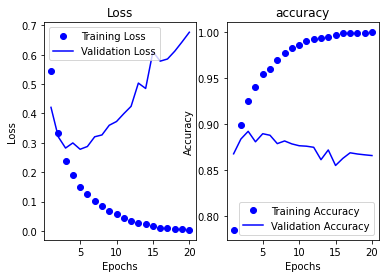

In [53]:
make_eval_plot(history)

### layer 1개 혹은 layer 3개를 가진 모델

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5011 - accuracy: 0.8001 - val_loss: 0.3986 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3225 - accuracy: 0.9040 - val_loss: 0.3223 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2486 - accuracy: 0.9250 - val_loss: 0.2926 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2042 - accuracy: 0.9385 - val_loss: 0.2800 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1729 - accuracy: 0.9485 - val_loss: 0.2932 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1494 - accuracy: 0.9557 - val_loss: 0.2738 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1305 - accuracy: 0.9621 - val_loss: 0.2923 - val_accuracy: 0.8860
Epoch 8/20
30

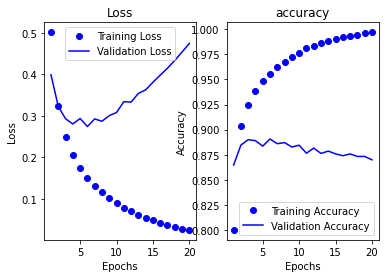

In [56]:
modelA = models.Sequential()
modelA.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
modelA.add(layers.Dense(1, activation ='sigmoid'))
modelA.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
history = modelA.fit(partial_x_train, partial_y_train, epochs = 20, batch_size= 512, validation_data = (x_val, y_val))
make_eval_plot(history)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5202 - accuracy: 0.7824 - val_loss: 0.3959 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3054 - accuracy: 0.9035 - val_loss: 0.3252 - val_accuracy: 0.8707
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2191 - accuracy: 0.9286 - val_loss: 0.2938 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1712 - accuracy: 0.9443 - val_loss: 0.2788 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1419 - accuracy: 0.9540 - val_loss: 0.3073 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1146 - accuracy: 0.9643 - val_loss: 0.3085 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0985 - accuracy: 0.9690 - val_loss: 0.3233 - val_accuracy: 0.8823
Epoch 8/20
30

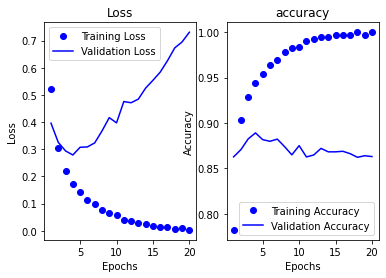

In [55]:
modelB = models.Sequential()
modelB.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
modelB.add(layers.Dense(16, activation ='relu'))
modelB.add(layers.Dense(16, activation ='relu'))
modelB.add(layers.Dense(1, activation ='sigmoid'))
modelB.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
history = modelB.fit(partial_x_train, partial_y_train, epochs = 20, batch_size= 512, validation_data = (x_val, y_val))
make_eval_plot(history)

layer의 깊이에 따라 overfitting의 정도가 어떻게 달라지는지 관찰하고 싶어서 해 봤는데, 잘 모르겠다.

In [60]:
modelA = models.Sequential()
modelA.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
modelA.add(layers.Dense(1, activation ='sigmoid'))
modelA.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
modelB.fit(x_train, y_train, epochs = 3, batch_size= 512)

modelB = models.Sequential()
modelB.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
modelB.add(layers.Dense(16, activation ='relu'))
modelB.add(layers.Dense(16, activation ='relu'))
modelB.add(layers.Dense(1, activation ='sigmoid'))
modelB.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
modelB.fit(x_train, y_train, epochs = 3, batch_size= 512, validation_data = (x_val, y_val))

Epoch 1/3
49/49 [==============================] - 1s 26ms/step - loss: 0.1984 - accuracy: 0.9286
Epoch 2/3
49/49 [==============================] - 1s 25ms/step - loss: 0.1690 - accuracy: 0.9396
Epoch 3/3
49/49 [==============================] - 1s 25ms/step - loss: 0.1465 - accuracy: 0.9473
Epoch 1/3
49/49 [==============================] - 2s 34ms/step - loss: 0.4465 - accuracy: 0.8225 - val_loss: 0.2906 - val_accuracy: 0.8978
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.2531 - accuracy: 0.9103 - val_loss: 0.1818 - val_accuracy: 0.9452
Epoch 3/3
49/49 [==============================] - 1s 28ms/step - loss: 0.1965 - accuracy: 0.9292 - val_loss: 0.1409 - val_accuracy: 0.9584


In [61]:
modelA.evaluate(x_test, y_test)
modelB.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.8842


[0.2892708480358124, 0.8842399716377258]

layer가 1개 뿐이었던 모델은 훈련할 때의 accuracy는 나쁘지 않았는데 test data에서의 성과는 확실히 좋지 않다.

In [64]:
modelC = models.Sequential()
modelC.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
modelB.add(layers.Dense(32, activation ='relu'))
modelC.add(layers.Dense(1, activation ='sigmoid'))
modelC.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
modelC.fit(x_train, y_train, epochs = 3, batch_size= 512)

Epoch 1/3
49/49 [==============================] - 2s 33ms/step - loss: 0.4179 - accuracy: 0.8292
Epoch 2/3
49/49 [==============================] - 2s 32ms/step - loss: 0.2488 - accuracy: 0.9120
Epoch 3/3
49/49 [==============================] - 2s 34ms/step - loss: 0.2001 - accuracy: 0.9292


In [65]:
modelC.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2818 - accuracy: 0.8884


[0.2817860543727875, 0.8883600234985352]

레이어 두 개, 은닉 유닛 32로 늘렸을 때 학습에 걸리는 시간이 늘지만 accuracy는 늘어났음을 볼 수 있었다.